##Advanced Validation Lecture

### 1. Report on how the K-Fold CV score compared to your single holdout AUC 
### 2. Write a short description of your model's performance.   Include AUC, Accuracy, Precision, and Recall in your discussion.

The AUC score is: 0.995321637427
The Accuracy score is: 0.964285714286
The Precision score is: 0.96
The Recall score is: 0.96

The K-Fold Cross Validation score, at 10 folds, came out to have a score of 0.967202 +/-  0.017596. The single holdout AUC score came out to be 0.995321637427. It is probable that the K-Fold CV score is a much better indicator to understand what is considered to be malignant based on our dataset. Since our data set is relatively small, we are better off relying more on the k-fold CV score over the AUC score, which would work best for bigger data sets. As you can see by the scores, we can assume the AUC score suffers from overfitting since it is extremely close to a score of 1.

By separating the dataset into smaller sets and repeating this n times (in this case 10 times) we can get a set of scores then average that out to get a much more relaistic score for this type of dataset, which would be 0.967202.

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import math

%pylab inline

/Applications/Python/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Applications/Python/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib


### Dataset:  Breast Cancer

In [2]:
data = pd.read_csv("breast_cancer.csv")

In [3]:
data.head()

,Unnamed: 0,id number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,malignant
0,0,1000025,5,1,1,1,2,1,3,1,1,0
1,1,1002945,5,4,4,5,7,10,3,2,1,0
2,2,1015425,3,1,1,1,2,2,3,1,1,0
3,3,1016277,6,8,8,1,3,4,3,7,1,0
4,4,1017023,4,1,1,3,2,1,3,1,1,0


In [4]:
data = data.drop(['Unnamed: 0', 'id number'], axis=1)

In [5]:
#Setting the feature we want to predict
y = data.pop("malignant")

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=.2, random_state=42)

### Grid Search!

In [7]:
### Grid Search
n_estimators = [300,400,500]
max_features = ['auto', 'sqrt','log2']
min_samples_split = [3,5,7]


rfc = RandomForestClassifier(n_jobs=1)
#Parameters of pipelines can be set using ‘__’ separated parameter names:
estimator = GridSearchCV(rfc,
                         dict(n_estimators=n_estimators,
                              max_features=max_features,
                              min_samples_split=min_samples_split
                              ), cv=None, n_jobs=-1)
                              

In [8]:
estimator.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [3, 5, 7], 'max_features': ['auto', 'sqrt', 'log2'], 'n_estimators': [300, 400, 500]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [9]:
estimator.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [10]:
best_rfc = estimator.best_estimator_

### Accuracy



In [11]:
accuracy = accuracy_score(y_test, best_rfc.predict(X_test))
print "Accuracy: ", accuracy

Accuracy:  0.964285714286


In [12]:
y_hat = best_rfc.predict(X_test)

In [13]:
y_hat

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0])

In [14]:
y_test

158    0
499    0
396    0
155    1
321    0
212    0
234    0
289    1
300    1
356    1
672    0
328    1
199    0
78     0
598    0
569    1
446    0
506    1
626    1
603    1
360    1
338    0
668    1
290    0
284    1
331    0
477    0
54     1
248    0
223    1
      ..
259    0
422    0
6      0
101    1
542    0
299    1
395    0
501    0
318    0
145    0
486    0
353    1
208    0
695    0
361    1
86     1
664    0
481    0
633    1
41     1
108    0
690    0
56     1
424    0
514    1
24     0
218    1
431    0
281    0
110    0
Name: malignant, dtype: int64

In [15]:
correct = 0
total = y_test.shape[0]
for pred_val, truth_val in zip(y_hat, y_test):
    if pred_val == truth_val:
        correct +=1

print correct / float(total)
        

0.964285714286


### Precision and Recall

In [16]:
print classification_report(y_test, best_rfc.predict(X_test))

             precision    recall  f1-score   support

          0       0.97      0.98      0.97        95
          1       0.95      0.93      0.94        45

avg / total       0.96      0.96      0.96       140



Precision:   The model will correctly identify 96% of winners.   Conversely there is a 4% chance it will identify a non-winner as a winner.  (tp / tp+fp)

Recall:  Of the people the model identified as winners, 96% of them will actually be winners.  (tp / tp + fn)

In [17]:
print confusion_matrix(y_test, best_rfc.predict(X_test))

[[93  2]
 [ 3 42]]


**Precision:**  43 / 43 + 2 = .96

**Recall:**   43 / 43 + 2 = .96

### AUC

In [18]:
roc = roc_auc_score(y_test, best_rfc.predict_proba(X_test)[:,1])
print "AUC Score: ", roc

AUC Score:  0.995321637427


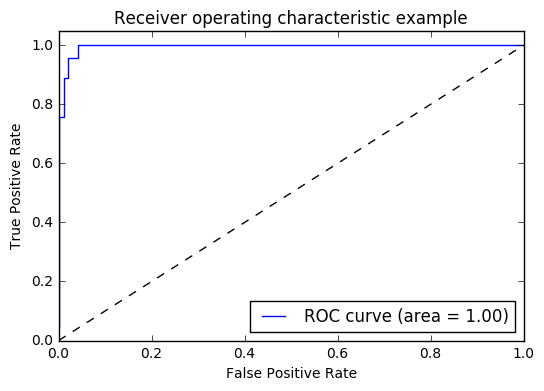

In [19]:
fpr, tpr, thresholds = roc_curve(y_test, best_rfc.predict_proba(X_test)[:,1])
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### But!  

So far our entire strategy has been to fit a model as strongly as possible to our 20% holdout.   What if our 20% hold out doesn't contain the tricky cases, or certain edge cases?  What if our random 20% sample doesn't really reflect reality?

When we choose hyperparameters, we choose them to optimize the 20% holdout.   

Our model will overfit to the 20% holdout, and may not actually perform well in real life.




### Train, Test, Validation

What if instead, we split our data into three sets?   

Train = 60% for training

Validation = 20% for model tuning

Test = 20% for actual model testing.   Not used for parameter estimation.


**Pros:**  This keeps overfitting to our test set under control.   

**Cons:** Our training data keeps getting smaller.   

Good method for very large N, but here we have a smaller N.


### K-Fold Cross Validation

1.  Split the data into K chunks
2.  Train K models, retain a chunk for testing and use the other K-1 chunks for training.
3.  The result is K scores, which can be combined into a single average score for the model

In [20]:
from sklearn import cross_validation
scores = cross_validation.cross_val_score(best_rfc, data, y, cv=10)

In [21]:
scores

array([ 0.92957746,  0.97142857,  0.97142857,  0.91428571,  0.98571429,
        0.95714286,  0.98571429,  0.98571429,  0.98550725,  0.98550725])

In [22]:
mean_score = scores.mean()
std_dev = scores.std()
std_error = scores.std() / math.sqrt(scores.shape[0])
ci =  2.262 * std_error
lower_bound = mean_score - ci
upper_bound = mean_score + ci

print "Score is %f +/-  %f" % (mean_score, ci)
print '95 percent probability that if this experiment were repeated over and over the average score would be between %f and %f' % (lower_bound, upper_bound)

Score is 0.967202 +/-  0.017596
95 percent probability that if this experiment were repeated over and over the average score would be between 0.949606 and 0.984798
